In [155]:
import joblib

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


**Read and shuffle the dataset**

In [157]:
df = pd.read_csv('./dataset.csv')
df = shuffle(df,random_state=22)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4207,Tuberculosis,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN
4549,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1683,Drug Reaction,itching,skin_rash,stomach_pain,spotting_ urination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289,Peptic ulcer diseae,vomiting,indigestion,loss_of_appetite,abdominal_pain,passage_of_gases,internal_itching,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2251,Hepatitis B,itching,fatigue,lethargy,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,NaN,NaN,NaN,NaN,NaN


**Removing Hyphen from strings**

In [158]:
for col in df.columns:
    
    df[col] = df[col].str.replace('_',' ')
df.head()    

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4207,Tuberculosis,chills,vomiting,fatigue,weight loss,cough,high fever,breathlessness,sweating,loss of appetite,mild fever,yellowing of eyes,swelled lymph nodes,malaise,phlegm,chest pain,blood in sputum,NaN
4549,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1683,Drug Reaction,itching,skin rash,stomach pain,spotting urination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289,Peptic ulcer diseae,vomiting,indigestion,loss of appetite,abdominal pain,passage of gases,internal itching,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2251,Hepatitis B,itching,fatigue,lethargy,yellowish skin,dark urine,loss of appetite,abdominal pain,yellow urine,yellowing of eyes,malaise,receiving blood transfusion,receiving unsterile injections,NaN,NaN,NaN,NaN,NaN


**Dataset characteristics**

In [159]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Tuberculosis,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,malaise,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


**Check for null and NaN values**

In [160]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


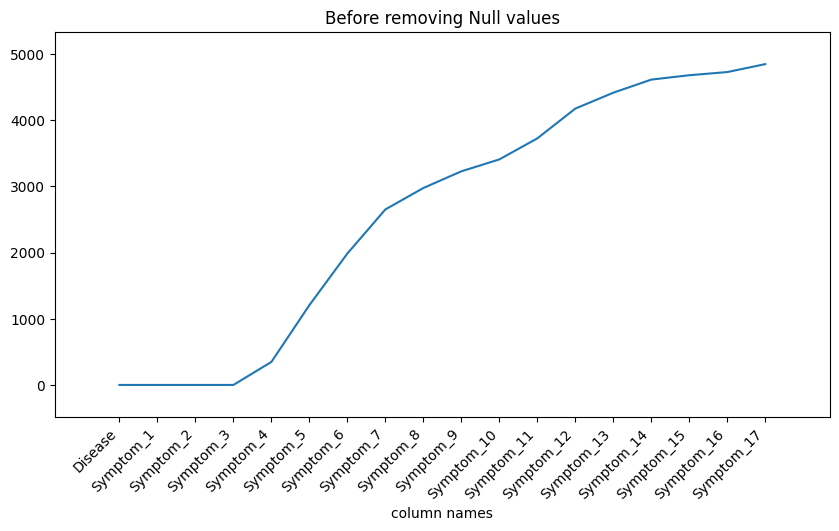

In [161]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

**Remove the trailing space from the symptom columns**

In [162]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Tuberculosis,chills,vomiting,fatigue,weight loss,cough,high fever,breathlessness,sweating,loss of appetite,mild fever,yellowing of eyes,swelled lymph nodes,malaise,phlegm,chest pain,blood in sputum,NaN
1,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Drug Reaction,itching,skin rash,stomach pain,spotting urination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Peptic ulcer diseae,vomiting,indigestion,loss of appetite,abdominal pain,passage of gases,internal itching,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hepatitis B,itching,fatigue,lethargy,yellowish skin,dark urine,loss of appetite,abdominal pain,yellow urine,yellowing of eyes,malaise,receiving blood transfusion,receiving unsterile injections,NaN,NaN,NaN,NaN,NaN


**Fill the NaN values with zero**

In [163]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Tuberculosis,chills,vomiting,fatigue,weight loss,cough,high fever,breathlessness,sweating,loss of appetite,mild fever,yellowing of eyes,swelled lymph nodes,malaise,phlegm,chest pain,blood in sputum,0
1,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,0,0,0,0,0,0,0,0,0,0,0
2,Drug Reaction,itching,skin rash,stomach pain,spotting urination,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Peptic ulcer diseae,vomiting,indigestion,loss of appetite,abdominal pain,passage of gases,internal itching,0,0,0,0,0,0,0,0,0,0,0
4,Hepatitis B,itching,fatigue,lethargy,yellowish skin,dark urine,loss of appetite,abdominal pain,yellow urine,yellowing of eyes,malaise,receiving blood transfusion,receiving unsterile injections,0,0,0,0,0


**Symptom severity rank**

In [164]:
df1 = pd.read_csv('./Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


**Get overall list of symptoms**

In [165]:
df1['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

**Encode symptoms in the data with the symptom rank**

In [166]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Tuberculosis,3,5,4,3,4,7,4,3,4,5,4,6,6,5,7,5,0
1,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0
2,Drug Reaction,1,3,5,spotting urination,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Peptic ulcer diseae,5,5,4,4,5,4,0,0,0,0,0,0,0,0,0,0,0
4,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0


**Assign symptoms with no rank to zero**

In [167]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Tuberculosis,3,5,4,3,4,7,4,3,4,5,4,6,6,5,7,5,0
1,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0
2,Drug Reaction,1,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Peptic ulcer diseae,5,5,4,4,5,4,0,0,0,0,0,0,0,0,0,0,0
4,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
5,Impetigo,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Arthritis,2,4,5,5,2,0,0,0,0,0,0,0,0,0,0,0,0
7,Pneumonia,3,4,7,4,3,6,5,7,5,4,0,0,0,0,0,0,0
8,Jaundice,1,5,4,7,3,4,4,0,0,0,0,0,0,0,0,0,0
9,Heart attack,5,4,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0


**Check if entire columns have zero values so we can drop those values**

In [168]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


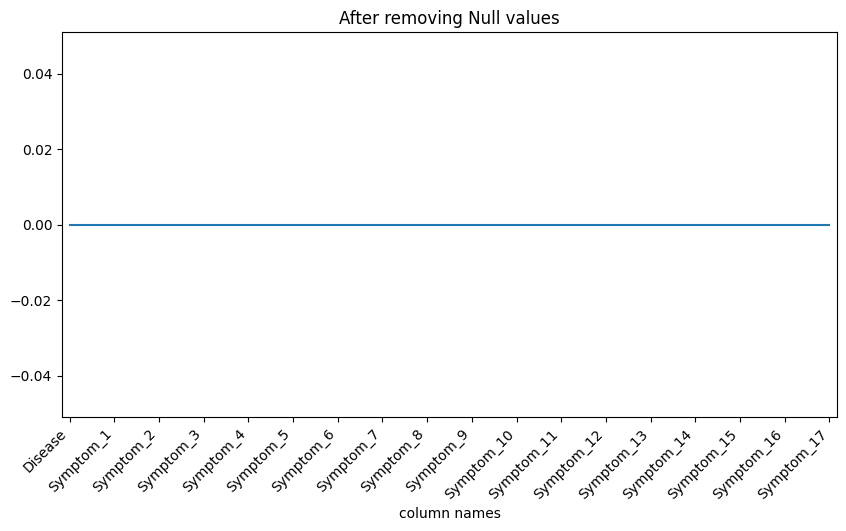

In [169]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [170]:
print("Number of symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


**Get the names of diseases from data**

In [171]:
df['Disease'].unique()

array(['Tuberculosis', 'Psoriasis', 'Drug Reaction',
       'Peptic ulcer diseae', 'Hepatitis B', 'Impetigo', 'Arthritis',
       'Pneumonia', 'Jaundice', 'Heart attack', 'Hepatitis C',
       'Dimorphic hemmorhoids(piles)', 'Migraine', 'Hypoglycemia',
       'Common Cold', 'Hypothyroidism', 'GERD', 'Allergy',
       'Cervical spondylosis', 'Gastroenteritis', 'Bronchial Asthma',
       'Typhoid', 'Varicose veins', 'hepatitis A',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Hepatitis D',
       'AIDS', 'Paralysis (brain hemorrhage)', 'Chicken pox',
       'Alcoholic hepatitis', 'Osteoarthristis', 'Chronic cholestasis',
       'Diabetes', 'Hyperthyroidism', 'Malaria', 'Hypertension', 'Dengue',
       'Fungal infection', 'Urinary tract infection', 'Hepatitis E'],
      dtype=object)

### Select the features as symptoms column and label as Disease column

Explination: A **feature** is an input; **label** is an output.
A feature is one column of the data in your input set. For instance, if you're trying to predict the type of pet someone will choose, your input features might include age, home region, family income, etc. The label is the final choice, such as dog, fish, iguana, rock, etc.

Once you've trained your model, you will give it sets of new input containing those features; it will return the predicted "label" (pet type) for that person.

In [172]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

## Splitting the dataset to training (80%) and testing (20%)

Separating data into training and testing sets is an important part of evaluating data mining models. Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.
After a model has been processed by using the training set, we test the model by making predictions against the test set. Because the data in the testing set already contains known values for the attribute that you want to predict, it is easy to determine whether the model's guesses are correct.

* Train Dataset: Used to fit the machine learning model.
* Test Dataset: Used to evaluate the fit machine learning model.

In [173]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train, x_test.shape, y_train, y_test.shape)

[[5 3 4 ... 0 0 0]
 [5 4 6 ... 0 0 0]
 [4 3 5 ... 0 0 0]
 ...
 [2 4 5 ... 0 0 0]
 [3 5 7 ... 0 0 0]
 [3 5 4 ... 5 0 0]] (984, 17) ['Gastroenteritis' 'Gastroenteritis' 'Hypothyroidism' ... 'Arthritis'
 'Malaria' 'Tuberculosis'] (984,)


### Compute the F1 score, also known as balanced F-score or F-measure.

The F1 score can be interpreted as a weighted average of the precision and
recall, where an F1 score reaches its best value at 1 and worst score at 0.
The relative contribution of precision and recall to the F1 score are
equal. The formula for the F1 score is

    F1 = 2 * (precision * recall) / (precision + recall)

# Decision Tree

F1-score% = 94.86448411340092 | Accuracy% = 95.42682926829268


<Axes: >

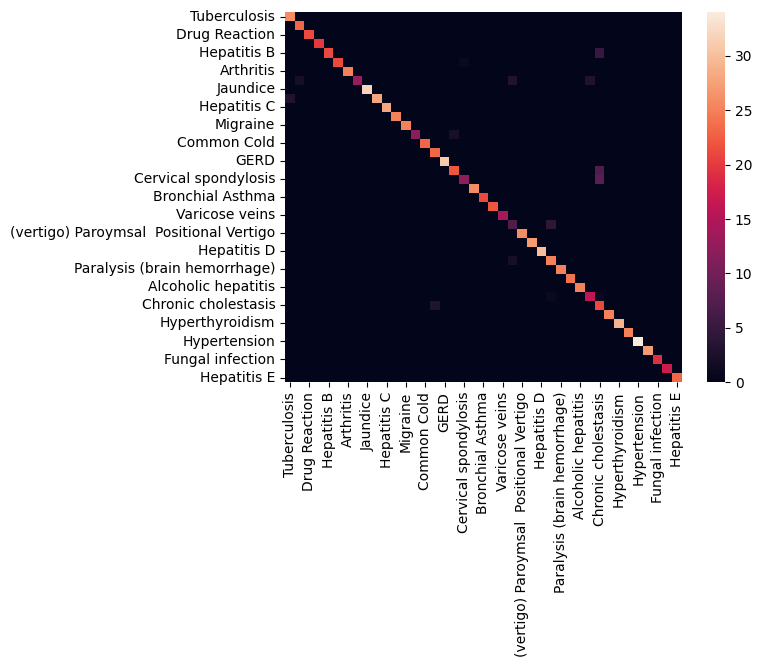

In [174]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [175]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 97.179%, Standard Deviation: (1.42%)


In [176]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

Mean Accuracy: 92.178%, Standard Deviation: (2.08%)


# Random Forest

In [177]:
rfc=RandomForestClassifier(random_state=42)

F1-score% = 98.77733560503728 | Accuracy% = 98.98373983739837


<Axes: >

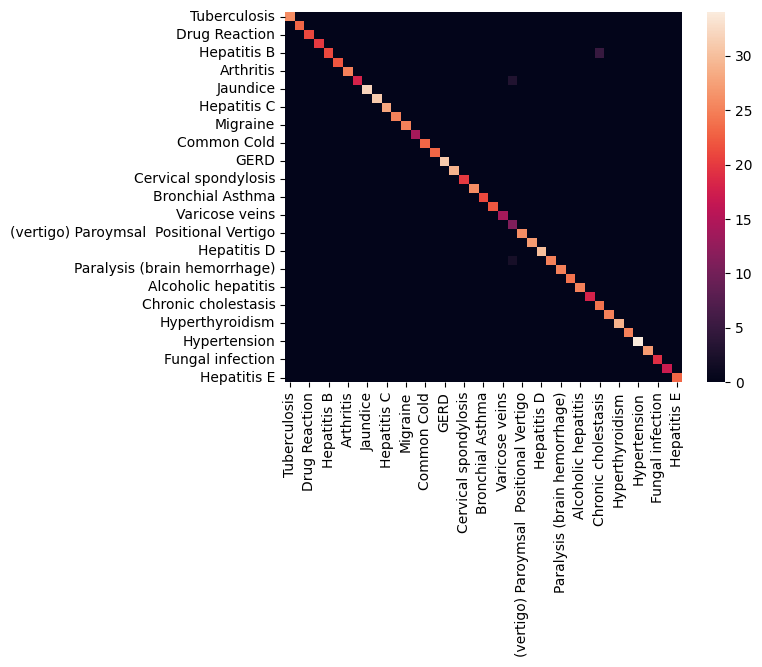

In [178]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [179]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 99.492%, Standard Deviation: (0.28%)


In [180]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 98.984%, Standard Deviation: (0.64%)


# Fucntion to manually test the models

In [181]:
discrp = pd.read_csv("./symptom_Description.csv")

In [182]:
discrp.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [183]:
ektra7at = pd.read_csv("./symptom_precaution.csv")

In [184]:
ektra7at.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


**Save Random Forest model**

In [185]:
# save
joblib.dump(rfc, "./random_forest.joblib")

['./random_forest.joblib']

**Load Model**

In [186]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./random_forest.joblib")

In [187]:
def predd(x,symptoms):

    psymptoms = [0]*17
    print(psymptoms,"9999999")
    for i in range(len(symptoms)):
        psymptoms[i]=symptoms[i]
    #print(psymptoms)
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]
    psy = [psymptoms]
    pred2 = x.predict(psy)
    disp= discrp[discrp['Disease']==pred2[0]]
    disp = disp.values[0][1]
    recomnd = ektra7at[ektra7at['Disease']==pred2[0]]
    c=np.where(ektra7at['Disease']==pred2[0])[0][0]
    precuation_list=[]
    for i in range(1,len(ektra7at.iloc[c])):
          precuation_list.append(ektra7at.iloc[c,i])
    print("The Disease Name: ",pred2[0])
    print("The Disease Discription: ",disp)
    print("Recommended Things to do at home: ")
    for i in precuation_list:
        print(i)

    # Your existing code to make a prediction
    # Replace the print statements with a dictionary
    result = {
        "Disease": pred2[0],
        "Disease_Description": disp,
        "Precautions": precuation_list
    }
    return result


# Comparison between algorithms testing and training

In [188]:
n_groups = 2
algorithms = ('Decision Tree', 'Random Forest')
train_accuracy = (DS_train.mean()*100.0,
                 rnd_forest_train.mean()*100.0,)

In [189]:
test_accuracy = (DS_test.mean()*100.0,
                 rnd_forest_test.mean()*100.0)

In [190]:
Standard_Deviation=(DS_test.std()*100.0,     
                 rnd_forest_test.std()*100.0)

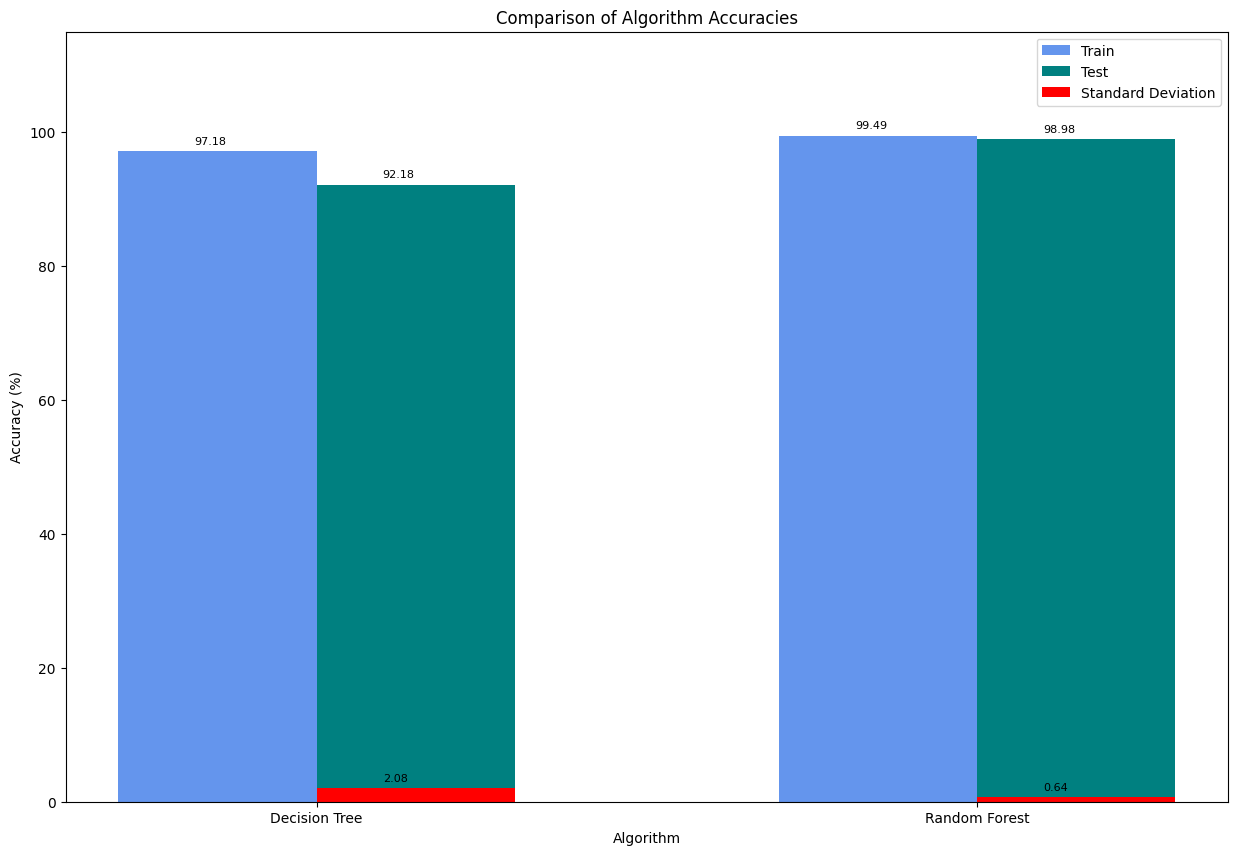

In [191]:
# create plot
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(Standard_Deviation):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))    

**Test it Like The user would do**

In [192]:
sympList=df1["Symptom"].to_list()
print(rnd_forest,sympList[0],"ppppp")
predd(rnd_forest,['vomiting'])

RandomForestClassifier(max_depth=13, n_estimators=500, random_state=42) itching ppppp
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 9999999
The Disease Name:  Urinary tract infection
The Disease Discription:  Urinary tract infection: An infection of the kidney, ureter, bladder, or urethra. Abbreviated UTI. Not everyone with a UTI has symptoms, but common symptoms include a frequent urge to urinate and pain or burning when urinating.
Recommended Things to do at home: 
drink plenty of water
increase vitamin c intake
drink cranberry juice
take probiotics


{'Disease': 'Urinary tract infection',
 'Disease_Description': 'Urinary tract infection: An infection of the kidney, ureter, bladder, or urethra. Abbreviated UTI. Not everyone with a UTI has symptoms, but common symptoms include a frequent urge to urinate and pain or burning when urinating.',
 'Precautions': ['drink plenty of water',
  'increase vitamin c intake',
  'drink cranberry juice',
  'take probiotics']}